In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [2]:
data=pd.read_csv(r"C:\Users\hp\Desktop\amazon.csv", encoding = 'latin1')

In [3]:
data.head(-200)

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
...,...,...,...,...,...
6249,2012,Tocantins,Fevereiro,45.0,2012-01-01
6250,2013,Tocantins,Fevereiro,37.0,2013-01-01
6251,2014,Tocantins,Fevereiro,73.0,2014-01-01
6252,2015,Tocantins,Fevereiro,65.0,2015-01-01


In [4]:
data.shape

(6454, 5)

In [5]:
# check null values
data.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [6]:
#overall statistic about Dataframe
pd.options.display.float_format = '{:0,.2f}'.format
data.describe()

,year,number
count,"6,454.00","6,454.00"
mean,"2,007.46",108.29
std,5.75,190.81
min,"1,998.00",0.00
25%,"2,002.00",3.00
50%,"2,007.00",24.00
75%,"2,012.00",113.00
max,"2,017.00",998.00


In [7]:
data['month']

0        Janeiro
1        Janeiro
2        Janeiro
3        Janeiro
4        Janeiro
          ...   
6449    Dezembro
6450    Dezembro
6451    Dezembro
6452    Dezembro
6453    Dezembro
Name: month, Length: 6454, dtype: object

In [8]:
#Rename Month Names To English
data['eng_month'] = data['month'].map({'Janeiro':'january',
                                       'Dezembro':'december',
                                       'Novembro':'november',
                                       'Outubro':'oct',
                                       'Setembro':'sep',
                                       'Agosto':'aug',
                                       'Julho':'july',
                                       'Junho':'june',
                                       'Maio':'may',
                                       'Abril':'april',
                                       'Março':'Março',
                                       'Fevereiro':'feb'
                                      })                                      

In [9]:
data.head()

,year,state,month,number,date,eng_month
0,1998,Acre,Janeiro,0.00,1998-01-01,january
1,1999,Acre,Janeiro,0.00,1999-01-01,january
2,2000,Acre,Janeiro,0.00,2000-01-01,january
3,2001,Acre,Janeiro,0.00,2001-01-01,january
4,2002,Acre,Janeiro,0.00,2002-01-01,january


In [10]:
data = data.drop('month',axis=1)

In [11]:
data.head()

,year,state,number,date,eng_month
0,1998,Acre,0.00,1998-01-01,january
1,1999,Acre,0.00,1999-01-01,january
2,2000,Acre,0.00,2000-01-01,january
3,2001,Acre,0.00,2001-01-01,january
4,2002,Acre,0.00,2002-01-01,january


In [12]:
#Total Number of Fires Registere
data_1 = data.groupby(['eng_month'])['number'].sum().sort_values(ascending=False).reset_index()


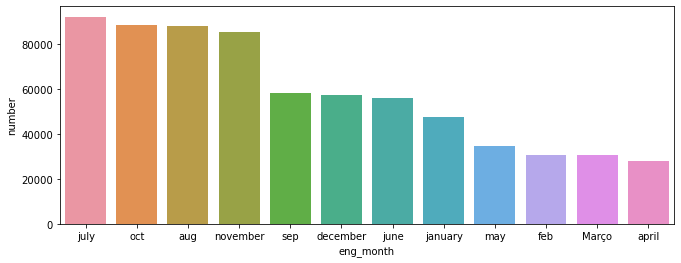

In [13]:
plt.figure(figsize = (11,4))
sns.barplot(x = "eng_month",y = "number", data = data_1)
plt.show()

In [14]:
# In Which year Maximum Number of Forest Fires Were Repor
data_2 = data.groupby(['year'])['number'].sum().sort_values(ascending=False).reset_index()

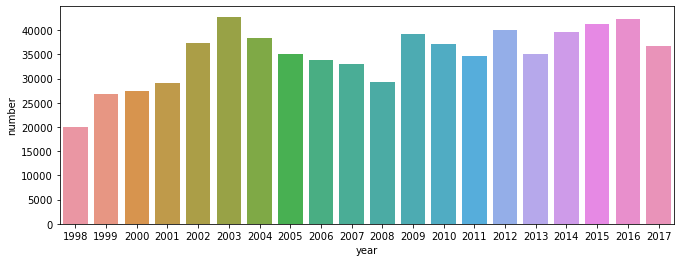

In [15]:
plt.figure(figsize = (11,4))
sns.barplot(x = "year",y = "number", data = data_2)
plt.show()

In [16]:
#Find Total Number of Fires Were Reported In Amazonas(day-wise)
data_3 = data[data['state'] == "Amazonas"]

In [17]:
# fetch days from date
data_3['date'] = pd.to_datetime(data_3['date'], errors='coerce')
data_3.groupby(data_3['date'].dt.dayofweek).sum().number


C:\Users\hp\AppData\Local\Temp\ipykernel_13944\1865298393.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_3['date'] = pd.to_datetime(data_3['date'], errors='coerce')


date
0   1,886.60
1   6,474.22
2   3,910.18
3   5,754.80
4   5,446.48
5   4,162.67
6   3,015.19
Name: number, dtype: float64

In [18]:

day = data_3.groupby(data_3['date'].dt.dayofweek).sum().number
import calendar
day.index = [calendar.day_name[x] for x in range (0,7)]
day = day.reset_index()




In [19]:
day


,index,number
0,Monday,"1,886.60"
1,Tuesday,"6,474.22"
2,Wednesday,"3,910.18"
3,Thursday,"5,754.80"
4,Friday,"5,446.48"
5,Saturday,"4,162.67"
6,Sunday,"3,015.19"


In [20]:
#Find Total Number of Fires  Were Reported In 2015 And Visualize Data Based on Each ‘Month’
fire = data[data['year']==2015].groupby('eng_month')['number'].sum().reset_index()


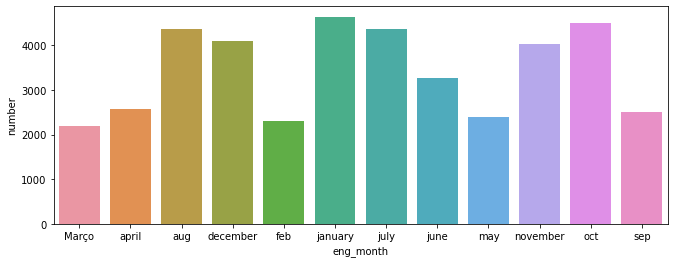

In [21]:
plt.figure(figsize = (11,4))
sns.barplot(x = "eng_month",y = "number", data = fire)
plt.show()

In [22]:
#Find Average Number of Fires Were Reported From Highest to Lowest (State-Wise)
data.groupby(['state'])['number'].sum().sort_values(ascending=False).reset_index()


,state,number
0,Mato Grosso,"96,246.03"
1,Paraiba,"52,435.92"
2,Sao Paulo,"51,121.20"
3,Rio,"45,160.86"
4,Bahia,"44,746.23"
5,Piau,"37,803.75"
6,Goias,"37,695.52"
7,Minas Gerais,"37,475.26"
8,Tocantins,"33,707.89"
9,Amazonas,"30,650.13"


In [23]:
#To Find The State Names Where Fires Were Reported In 'dec' Month
data[data['eng_month']=="december"]['state'].unique()


array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)